In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [209]:
df = pd.read_csv(r'../Useful data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [210]:
df.shape

(8807, 12)

In [211]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [212]:
df.groupby(by = ['rating']).size()

rating
66 min         1
74 min         1
84 min         1
G             41
NC-17          3
NR            80
PG           287
PG-13        490
R            799
TV-14       2160
TV-G         220
TV-MA       3207
TV-PG        863
TV-Y         307
TV-Y7        334
TV-Y7-FV       6
UR             3
dtype: int64

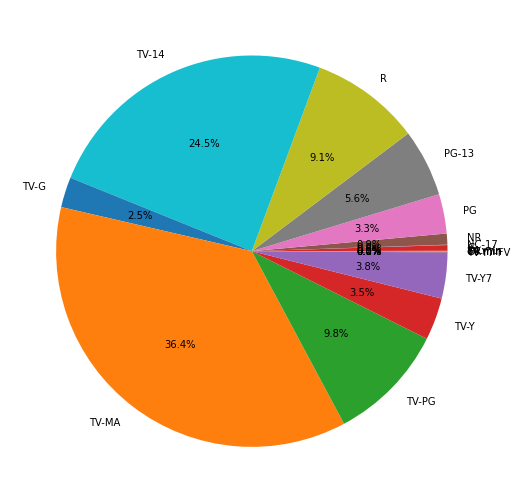

In [213]:
# distribution of contents


z = df.groupby(by = ['rating']).size()
plt.figure(figsize=(12,9))
plt.pie(z, labels=z.keys(), autopct='%0.1f%%')
plt.show()

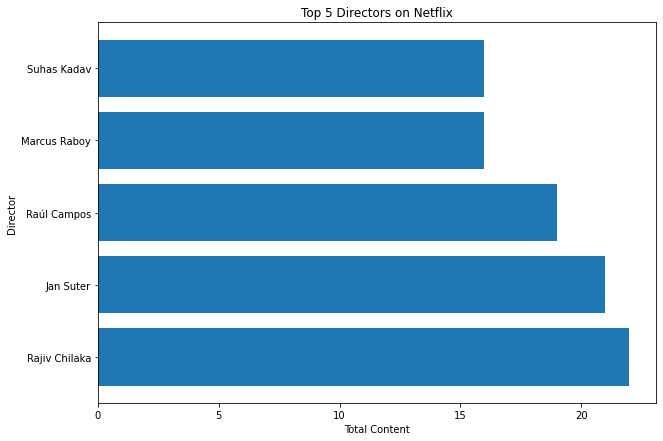

In [214]:
# ---------------------------------------   Top 5 Directors   --------------------------------------------------


df['director'] = df['director'].fillna('No Director Specified')

directors = []
d = df['director'].str.split(', ')
for index in range(len(d)):
    directors.extend(d[index])
directors = pd.Series(directors)
series = directors.value_counts()
directorTop5  = series[series.keys()!='No Director Specified'][:5]

plt.figure(figsize=(10,7))
plt.barh(directorTop5.keys(), directorTop5)
plt.xlabel('Total Content')
plt.ylabel('Director')
plt.title('Top 5 Directors on Netflix')
plt.show()

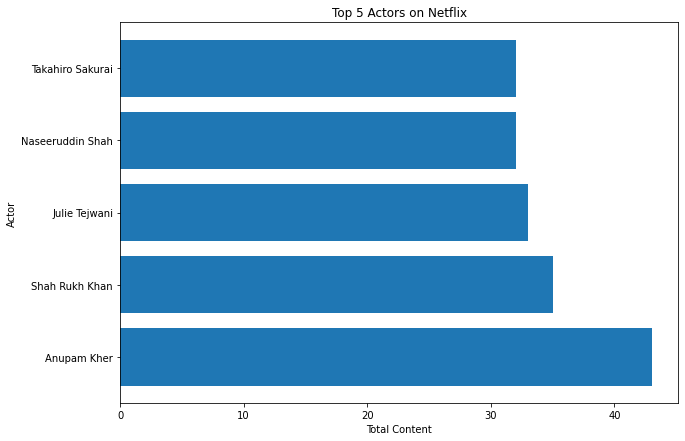

In [215]:
# ---------------------------------------   Top 5 Actors   -------------------------------------------------------


df['cast'] = df['cast'].fillna('No Cast Specified')

actors = []
d = df['cast'].str.split(', ')
for index in range(len(d)):
    actors.extend(d[index])
actors = pd.Series(actors)
series = actors.value_counts()
actorTop5 = series[series.keys()!='No Cast Specified'][:5]

plt.figure(figsize=(10,7))
plt.barh(actorTop5.keys(), actorTop5)
plt.xlabel('Total Content')
plt.ylabel('Actor')
plt.title('Top 5 Actors on Netflix')
plt.show()

In [216]:
# ---------------------------------   Analyzing the Content on Netflix   -----------------------------------------


df1 = df.loc[:, ['type', 'release_year']]
df1 = df1.rename(columns={'release_year':'Release Year'})
df2 = df1.groupby(['Release Year', 'type']).size().reset_index(name='Total Content')
df2 = df2.loc[df2['Release Year']>=2010]
df2

,Release Year,type,Total Content
95,2010,Movie,154
96,2010,TV Show,40
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173
100,2012,TV Show,64
101,2013,Movie,225
102,2013,TV Show,63
103,2014,Movie,264
104,2014,TV Show,88


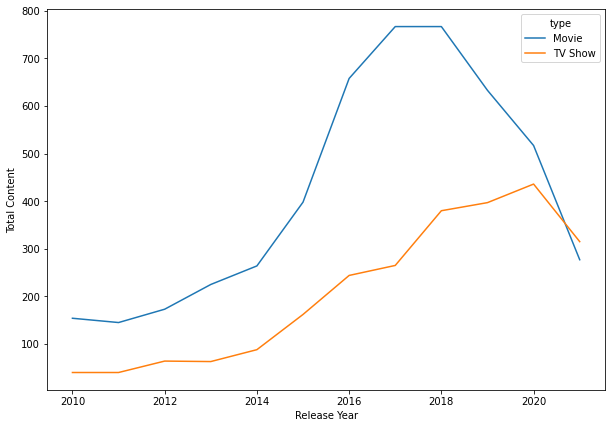

In [217]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.lineplot(data= df2, x='Release Year', y='Total Content', hue='type')
plt.show()

In [218]:
# ------------------------------------------   Sentiment Analysis   -----------------------------------------------


from textblob import TextBlob

In [219]:
df3 = df.loc[:, ['release_year', 'description']]
df3 = df3.rename(columns = {'release_year': 'Release Year'})

for i in range(len(df3)):
    z = df3.loc[i, 'description']
    testimonial = TextBlob(z)
    p=testimonial.sentiment.polarity

    if p==0:    sent='Neutral'
    elif p>0:   sent='Positive'
    else:   sent='Negative'

    df3.loc[i ,'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Content')
df3 = df3.loc[df3['Release Year']>=2010]
df3

,Release Year,Sentiment,Total Content
149,2010,Negative,53
150,2010,Neutral,40
151,2010,Positive,101
152,2011,Negative,46
153,2011,Neutral,33
154,2011,Positive,106
155,2012,Negative,73
156,2012,Neutral,39
157,2012,Positive,125
158,2013,Negative,93


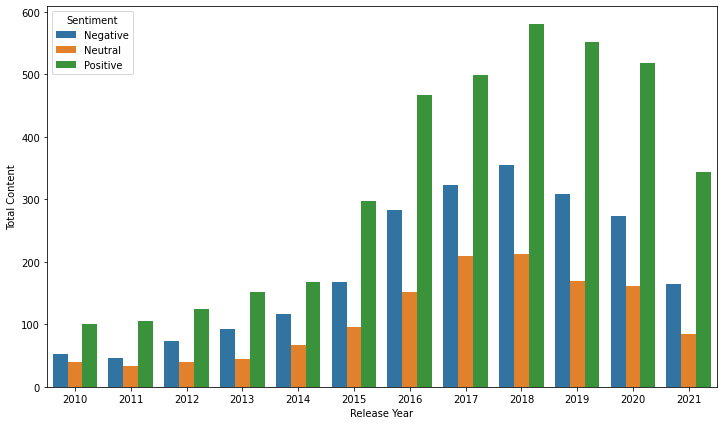

In [220]:
plt.figure(figsize=(12,7))
sns.barplot(data= df3, x='Release Year', y='Total Content', hue='Sentiment',)
plt.show()